# Imports

In [62]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from clusteval import clusteval
import random


# Testing

In [3]:
merged_crime_df = pd.read_csv('/home/mih_sud/code/willbanny//Location-Analysis/raw_data/Total_Crime_Data_2023_04.csv')

In [4]:
merged

NameError: name 'merged' is not defined

In [ ]:
def create_preproc_numerical():
    return make_pipeline(
        KNNImputer(),
        MinMaxScaler()
    )

def create_preproc_nominal():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    )

def create_preproc(X, percentile = 75):
    """Create an (unfitted) sklearn preprocessing pipeline well suited for the Houses Kaggle Competition

    Args:
        X (pandas.DataFrame): Feature matrix
        percentile (float): Percentage of feature to keep after one hot encoding

    Returns:
        sklearn.pipeline.Pipeline: un-fitted preprocessor
    """
    preproc_ordinal, feat_ordinal = create_preproc_ordinal()
    
    preproc_numerical = create_preproc_numerical()
    feat_numerical = sorted(X.select_dtypes(
        include=["int64", "float64"]).columns)
    
    preproc_nominal = create_preproc_nominal()
    feat_nominal = sorted(
        list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))
    
    feature_transformer = ColumnTransformer(
        [
        ("numerical_encoder", preproc_numerical, feat_numerical),
        ("ordinal_encoder", preproc_ordinal, feat_ordinal),
        ("nominal_encoder", preproc_nominal, feat_nominal)
        ],
        remainder="drop")

    feature_selector = SelectPercentile(
        mutual_info_regression,
        percentile=percentile,  # keep the xx% most important features
    )

    preproc = make_pipeline(
        feature_transformer,
        feature_selector
    )
    return preproc


# Feature Selection

In [5]:
leicester_golden_df = pd.read_csv("/home/mih_sud/code/willbanny/Location-Analysis/raw_data/golden_df_trial_bigQuery.csv")

In [6]:
leicester_golden_df

,Unnamed: 0,District_x,Description_x,GridName_x,lng,lat,hospital_500,train_station_500,bus_station_500,park_500,...,Robbery_1500,Shoplifting_1500,Drugs_1500,Theft from the person_1500,Possession of weapons_1500,Local_Authority_District_code__2019_,Local_Authority_District_name__2019_,Index_of_Multiple_Deprivation__IMD__Score,longitude,latitude
0,0,City of Leicester (B),Unitary Authority,Grid2_0,-1.178881,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
1,1,City of Leicester (B),Unitary Authority,Grid3_0,-1.164038,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
2,2,City of Leicester (B),Unitary Authority,Grid5_0,-1.134352,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
3,3,City of Leicester (B),Unitary Authority,Grid4_0,-1.149195,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
4,4,City of Leicester (B),Unitary Authority,Grid2_1,-1.178888,52.678007,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,27.035,-1.171282,52.671605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,City of Leicester (B),Unitary Authority,Grid6_11,-1.119727,52.588025,0,0,0,0,...,0,1,0,0,0,E06000016,Leicester,55.718,-1.131030,52.595230
96,96,City of Leicester (B),Unitary Authority,Grid3_12,-1.164166,52.579026,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,51.943,-1.154786,52.583273
97,97,City of Leicester (B),Unitary Authority,Grid4_12,-1.149359,52.579026,0,0,0,0,...,0,2,1,0,0,E06000016,Leicester,51.943,-1.154786,52.583273
98,98,City of Leicester (B),Unitary Authority,Grid2_11,-1.178964,52.588025,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,34.751,-1.162827,52.594066


In [7]:
leicester_golden_df[["District_y", "Description_y", "GridName_y"]]

,District_y,Description_y,GridName_y
0,City of Leicester (B),Unitary Authority,Grid2_0
1,City of Leicester (B),Unitary Authority,Grid3_0
2,City of Leicester (B),Unitary Authority,Grid5_0
3,City of Leicester (B),Unitary Authority,Grid4_0
4,City of Leicester (B),Unitary Authority,Grid2_1
...,...,...,...
95,City of Leicester (B),Unitary Authority,Grid6_11
96,City of Leicester (B),Unitary Authority,Grid3_12
97,City of Leicester (B),Unitary Authority,Grid4_12
98,City of Leicester (B),Unitary Authority,Grid2_11


In [8]:
leicester_golden_df.columns

Index(['Unnamed: 0', 'District_x', 'Description_x', 'GridName_x', 'lng', 'lat',
       'hospital_500', 'train_station_500', 'bus_station_500', 'park_500',
       'place_of_worship_500', 'hospital_1000', 'train_station_1000',
       'bus_station_1000', 'park_1000', 'place_of_worship_1000',
       'hospital_1500', 'train_station_1500', 'bus_station_1500', 'park_1500',
       'place_of_worship_1500', 'District_y', 'Description_y', 'GridName_y',
       'Anti-social behaviour_500', 'Other theft_500', 'Public order_500',
       'Vehicle crime_500', 'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000'

In [9]:
to_scale_df = leicester_golden_df.drop(columns = ["Unnamed: 0", "District_x", "Description_x", "GridName_x", "lng", "lat", "District_y", "Description_y", "GridName_y", "Local_Authority_District_code__2019_", "Local_Authority_District_name__2019_", "longitude", "latitude" ])

In [10]:
to_scale_df.shape

(100, 58)

In [11]:
pd.DataFrame(to_scale_df).corr().loc["park_500"]

hospital_500                                 0.231354
train_station_500                           -0.031187
bus_station_500                              0.455665
park_500                                     1.000000
place_of_worship_500                         0.446132
hospital_1000                                0.675868
train_station_1000                           0.012801
bus_station_1000                             0.507799
park_1000                                    0.696535
place_of_worship_1000                        0.471978
hospital_1500                                0.395950
train_station_1500                           0.508867
bus_station_1500                             0.348095
park_1500                                    0.624700
place_of_worship_1500                        0.465501
Anti-social behaviour_500                    0.382004
Other theft_500                              0.558131
Public order_500                             0.544262
Vehicle crime_500           

In [13]:
city_features = to_scale_df.columns

# Min Max Scaling Pipe

## Scaling

In [14]:
mm_scaler = MinMaxScaler()

In [15]:
mm_scaler.fit(to_scale_df)

MinMaxScaler()

In [16]:
mm_scaled_df = pd.DataFrame(mm_scaler.transform(to_scale_df), columns=city_features)

## Scaling Engineering 

In [17]:
mm_scaled_df.columns

Index(['hospital_500', 'train_station_500', 'bus_station_500', 'park_500',
       'place_of_worship_500', 'hospital_1000', 'train_station_1000',
       'bus_station_1000', 'park_1000', 'place_of_worship_1000',
       'hospital_1500', 'train_station_1500', 'bus_station_1500', 'park_1500',
       'place_of_worship_1500', 'Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the p

In [18]:
mm_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] = mm_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] *-1
mm_scaled_df

,hospital_500,train_station_500,bus_station_500,park_500,place_of_worship_500,hospital_1000,train_station_1000,bus_station_1000,park_1000,place_of_worship_1000,...,Burglary_1500,Criminal damage and arson_1500,Other crime_1500,Bicycle theft_1500,Robbery_1500,Shoplifting_1500,Drugs_1500,Theft from the person_1500,Possession of weapons_1500,Index_of_Multiple_Deprivation__IMD__Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.119270
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.027778,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.119270
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.119270
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.027778,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.119270
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.083333,-0.142857,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.330333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.333333,-0.083333,-0.142857,-0.0,-0.0,-0.018182,-0.000000,-0.000000,-0.0,0.759142
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.133333,-0.027778,-0.285714,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.702706
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200000,-0.111111,-0.285714,-0.0,-0.0,-0.036364,-0.033333,-0.000000,-0.0,0.702706
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.445687


In [19]:
mm_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']] = mm_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']]*2

# Robust Scaling Pipe

## Scaling

In [20]:
r_scaler = RobustScaler()

In [21]:
r_scaler.fit(to_scale_df)

RobustScaler()

In [22]:
r_scaled_df = pd.DataFrame(r_scaler.transform(to_scale_df), columns=city_features)

## Scaling Engineering 

In [23]:
r_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] = mm_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] *-1
r_scaled_df

,hospital_500,train_station_500,bus_station_500,park_500,place_of_worship_500,hospital_1000,train_station_1000,bus_station_1000,park_1000,place_of_worship_1000,...,Burglary_1500,Criminal damage and arson_1500,Other crime_1500,Bicycle theft_1500,Robbery_1500,Shoplifting_1500,Drugs_1500,Theft from the person_1500,Possession of weapons_1500,Index_of_Multiple_Deprivation__IMD__Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,-0.572723
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.027778,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,-0.572723
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,-0.572723
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.027778,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,-0.572723
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.083333,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.0,-0.049597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.083333,0.142857,0.0,0.0,0.018182,0.000000,0.000000,0.0,1.013219
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133333,0.027778,0.285714,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.873341
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200000,0.111111,0.285714,0.0,0.0,0.036364,0.033333,0.000000,0.0,0.873341
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.236311


In [24]:
r_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']] = r_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']]*2

# PCA

## Min Max PCA

In [25]:
mm_pca = PCA()

pip install clusteval

In [26]:
mm_pca.fit(mm_scaled_df)

PCA()

In [27]:
W = mm_pca.components_

In [28]:
W = pd.DataFrame(W.T,
                 index=city_features,
                 columns=[f'PC{i}' for i in range(1, len(city_features) + 1)])

In [29]:
mm_proj = mm_pca.transform(mm_scaled_df)
mm_proj = pd.DataFrame(mm_proj, columns=[f'PC{i}' for i in range(1, len(city_features) + 1)])


<Axes: >

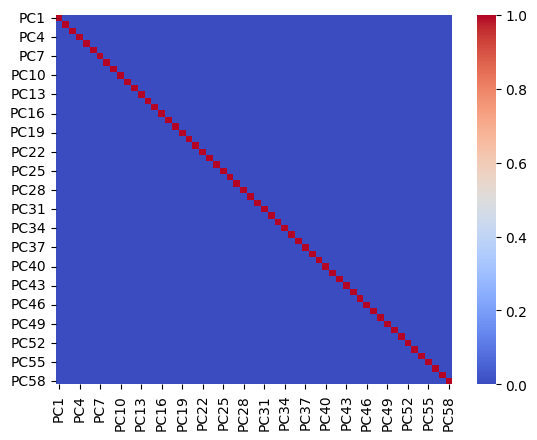

In [30]:
sns.heatmap(mm_proj.corr(), cmap='coolwarm')

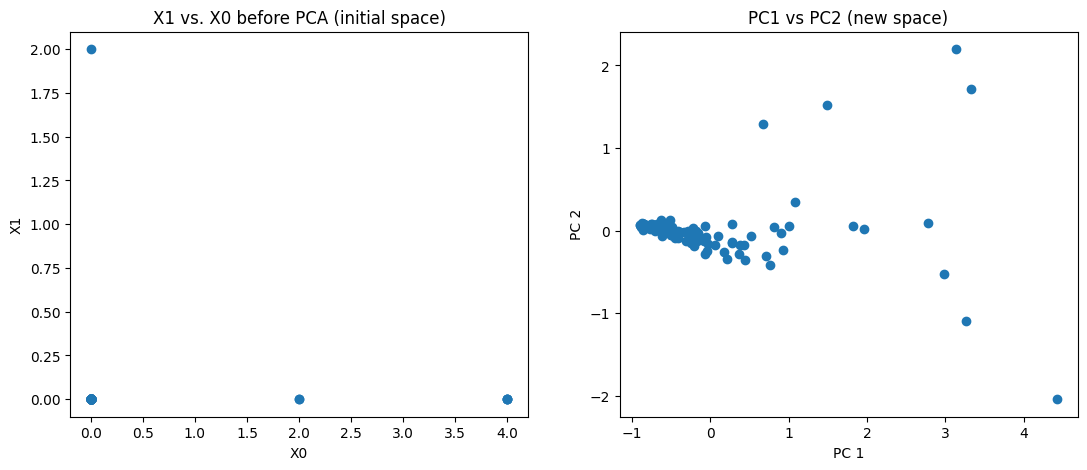

In [31]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(to_scale_df.iloc[:,0], to_scale_df.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(mm_proj.iloc[:,0], mm_proj.iloc[:,1]);

In [32]:
mm_pca.explained_variance_ratio_

array([4.68236321e-01, 8.23497053e-02, 6.84227475e-02, 5.64418759e-02,
       4.04900806e-02, 3.40474089e-02, 2.82348085e-02, 2.25787379e-02,
       1.99307937e-02, 1.92764303e-02, 1.65060091e-02, 1.52081389e-02,
       1.39996915e-02, 1.27648502e-02, 9.87260631e-03, 9.15727679e-03,
       8.31843768e-03, 7.88560935e-03, 7.09988743e-03, 6.56097171e-03,
       5.73138295e-03, 5.39738952e-03, 4.79203096e-03, 4.38249768e-03,
       3.94126903e-03, 3.51978976e-03, 3.00438398e-03, 2.81120450e-03,
       2.61531515e-03, 2.21106654e-03, 2.11809889e-03, 1.83786469e-03,
       1.49618924e-03, 1.27189830e-03, 1.10131112e-03, 9.14617427e-04,
       7.53273835e-04, 6.82906764e-04, 5.92749171e-04, 5.74477371e-04,
       4.70586738e-04, 4.06538551e-04, 3.43334340e-04, 2.91822610e-04,
       2.49364041e-04, 1.94432352e-04, 1.62260104e-04, 1.49511824e-04,
       1.37815273e-04, 1.14657424e-04, 8.77998961e-05, 6.49219557e-05,
       5.58167161e-05, 4.86302865e-05, 3.76014467e-05, 2.66987465e-05,
      

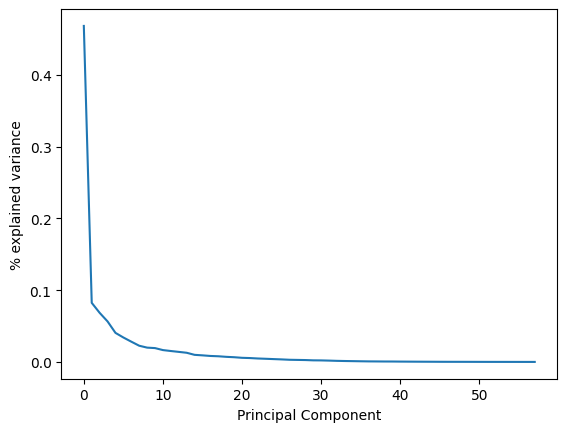

In [33]:
plt.plot(mm_pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [34]:
np.cumsum(mm_pca.explained_variance_ratio_)

array([0.46823632, 0.55058603, 0.61900877, 0.67545065, 0.71594073,
       0.74998814, 0.77822295, 0.80080169, 0.82073248, 0.84000891,
       0.85651492, 0.87172306, 0.88572275, 0.8984876 , 0.90836021,
       0.91751748, 0.92583592, 0.93372153, 0.94082142, 0.94738239,
       0.95311377, 0.95851116, 0.96330319, 0.96768569, 0.97162696,
       0.97514675, 0.97815113, 0.98096234, 0.98357765, 0.98578872,
       0.98790682, 0.98974468, 0.99124087, 0.99251277, 0.99361408,
       0.9945287 , 0.99528197, 0.99596488, 0.99655763, 0.99713211,
       0.99760269, 0.99800923, 0.99835257, 0.99864439, 0.99889375,
       0.99908818, 0.99925044, 0.99939996, 0.99953777, 0.99965243,
       0.99974023, 0.99980515, 0.99986097, 0.9999096 , 0.9999472 ,
       0.9999739 , 0.9999919 , 1.        ])

## Robust PCA

In [35]:
r_pca = PCA()


In [36]:
r_pca.fit(r_scaled_df)

W = r_pca.components_


W = pd.DataFrame(W.T,
                 index=city_features,
                 columns=[f'PC{i}' for i in range(1, len(city_features) + 1)])

In [37]:
r_proj = r_pca.transform(r_scaled_df)
r_proj = pd.DataFrame(r_proj, columns=[f'PC{i}' for i in range(1, len(city_features )+ 1)])

<Axes: >

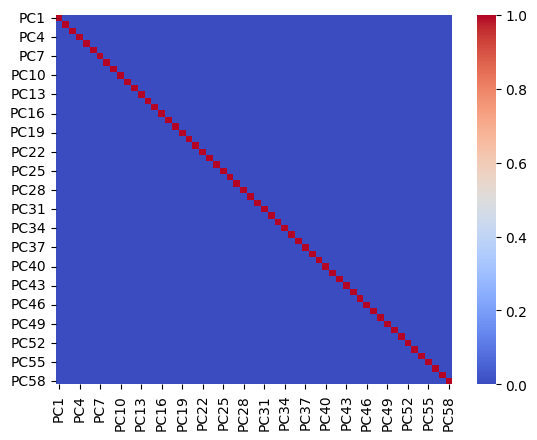

In [38]:
sns.heatmap(r_proj.corr(), cmap='coolwarm')

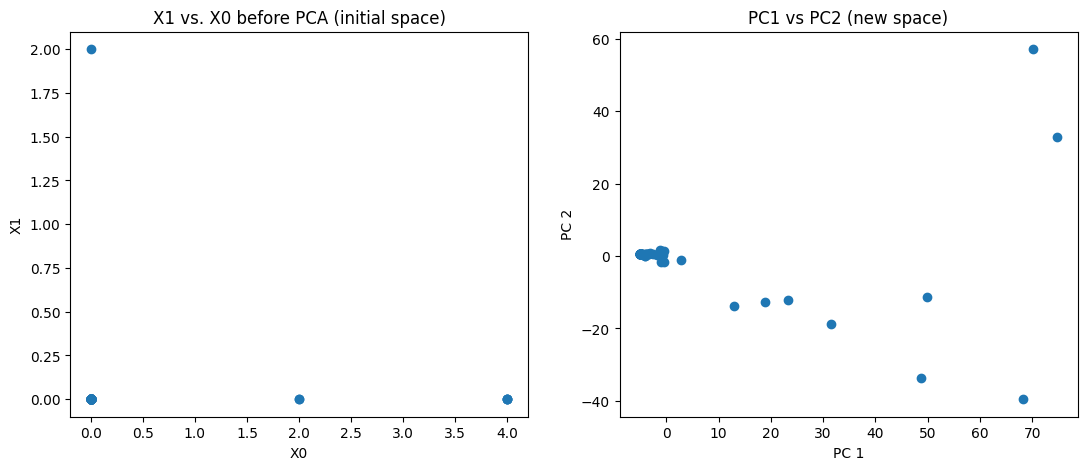

In [39]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(to_scale_df.iloc[:,0], to_scale_df.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(r_proj.iloc[:,0], r_proj.iloc[:,1]);

In [40]:
r_pca.explained_variance_ratio_

array([6.26128977e-01, 2.11171069e-01, 5.33092643e-02, 4.63053492e-02,
       2.18503485e-02, 1.76957153e-02, 9.28523194e-03, 5.49323317e-03,
       2.84604054e-03, 1.97404510e-03, 1.11648951e-03, 6.50904786e-04,
       3.90275598e-04, 3.50280427e-04, 2.10424178e-04, 1.74310864e-04,
       1.28221535e-04, 1.15554315e-04, 1.02871804e-04, 8.83773095e-05,
       7.41825302e-05, 7.16770100e-05, 6.62281648e-05, 4.90459888e-05,
       4.29502600e-05, 4.04007261e-05, 3.46272702e-05, 3.13530846e-05,
       2.99903129e-05, 2.62985017e-05, 2.07065084e-05, 1.71946937e-05,
       1.62643220e-05, 1.32707160e-05, 1.22799205e-05, 1.06679062e-05,
       9.52104652e-06, 8.02563300e-06, 6.76700749e-06, 5.03960622e-06,
       4.21678855e-06, 3.21420777e-06, 2.93133742e-06, 2.77380024e-06,
       2.27193197e-06, 1.96666955e-06, 1.83003475e-06, 1.51826884e-06,
       1.15514491e-06, 1.03153372e-06, 9.91911714e-07, 7.21635536e-07,
       4.92702200e-07, 4.30978738e-07, 3.00167833e-07, 2.80625689e-07,
      

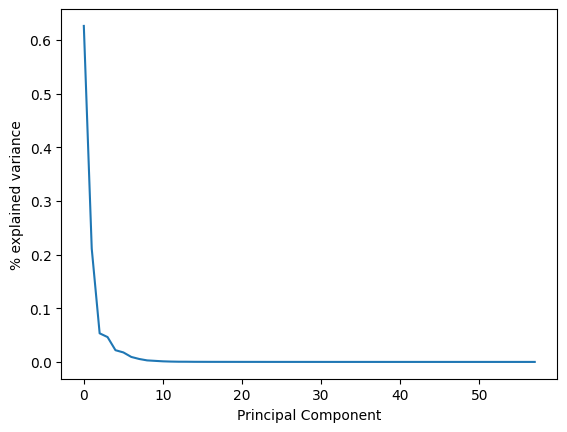

In [41]:
plt.plot(r_pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [42]:
np.cumsum(r_pca.explained_variance_ratio_)

array([0.62612898, 0.83730005, 0.89060931, 0.93691466, 0.95876501,
       0.97646072, 0.98574595, 0.99123919, 0.99408523, 0.99605927,
       0.99717576, 0.99782667, 0.99821694, 0.99856722, 0.99877765,
       0.99895196, 0.99908018, 0.99919573, 0.99929861, 0.99938698,
       0.99946117, 0.99953284, 0.99959907, 0.99964812, 0.99969107,
       0.99973147, 0.9997661 , 0.99979745, 0.99982744, 0.99985374,
       0.99987444, 0.99989164, 0.9999079 , 0.99992117, 0.99993345,
       0.99994412, 0.99995364, 0.99996167, 0.99996844, 0.99997348,
       0.99997769, 0.99998091, 0.99998384, 0.99998661, 0.99998888,
       0.99999085, 0.99999268, 0.9999942 , 0.99999535, 0.99999639,
       0.99999738, 0.9999981 , 0.99999859, 0.99999902, 0.99999932,
       0.9999996 , 0.99999982, 1.        ])

# ClustEval

## Min Max ClustEval

In [ ]:
mm_ce = clusteval(cluster = 'kmeans')
mm_results = mm_ce.fit(mm_proj)

In [ ]:
mm_ce.plot()

In [ ]:
mm_results

In [ ]:
mm_ce.scatter(mm_proj)

## Robust ClustEval

In [ ]:
r_ce = clusteval(cluster = 'kmeans')
r_results = r_ce.fit(r_proj)

In [ ]:
r_ce.plot()

In [ ]:
r_results

In [ ]:
r_ce.scatter(r_proj)

# Care Homes

In [ ]:
52.62172504585236, -1.1101221724736599

In [ ]:
52.65883926928807, -1.1306349699289144

In [ ]:
52.65852658755537, -1.143915581515234

In [ ]:
52.61347597404073, -1.0955431473301578

In [ ]:
52.65476308038716, -1.1228256434410278

In [ ]:
52.651683698337976, -1.175175487618207

In [43]:
care_home_dict = {"lat" : [52.62172504585236, 52.65883926928807, 52.65852658755537, 52.61347597404073, 52.65476308038716, 52.651683698337976] , "lng" : [-1.1101221724736599, -1.1306349699289144, -1.143915581515234, -1.0955431473301578, -1.1228256434410278, -1.175175487618207 ]}

In [44]:
care_home_df = pd.DataFrame(care_home_dict)

In [45]:
care_home_df

,lat,lng
0,52.621725,-1.110122
1,52.658839,-1.130635
2,52.658527,-1.143916
3,52.613476,-1.095543
4,52.654763,-1.122826
5,52.651684,-1.175175


# K-means

In [ ]:
mm_proj

## Min-Max K-means

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

Text(0.5, 0, 'k cluster number')

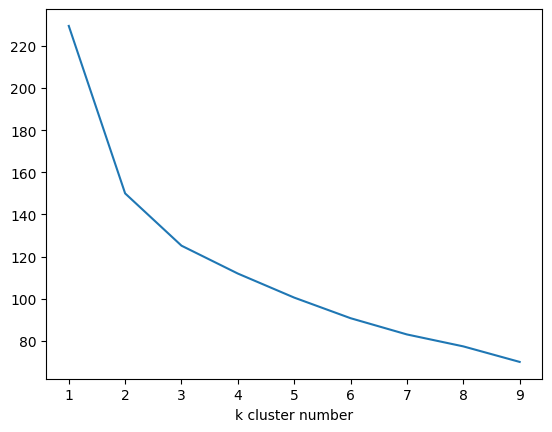

In [46]:
ks = range(1,10)
inertias = []
for k in ks:
    km_test = KMeans(n_clusters=k).fit(mm_proj)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [47]:
mm_km = KMeans(n_clusters= 3)
mm_km.fit(mm_proj)

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [48]:
mm_km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

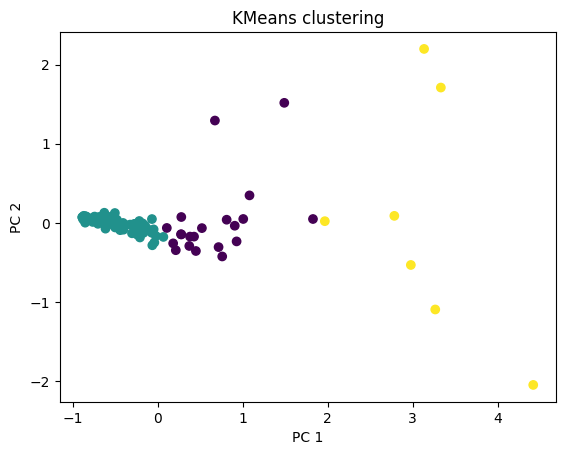

In [49]:
plt.scatter(mm_proj.iloc[:,0], mm_proj.iloc[:,1], c=mm_km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [50]:
care

NameError: name 'care' is not defined

/tmp/ipykernel_8579/2981577312.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = care_home_df["lat"], y = care_home_df["lng"], palette = "Set4")


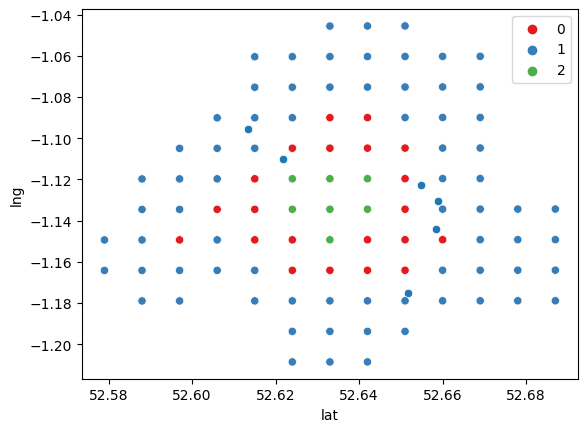

In [61]:
sns.scatterplot(x = care_home_df["lat"], y = care_home_df["lng"], palette = "Set4")
sns.scatterplot(x=leicester_golden_df['lat'], y=leicester_golden_df['lng'], hue=mm_km.labels_, palette='Set1')

plt.show()

## Robust K-Means

In [51]:
r_km = KMeans(n_clusters= 3)
r_km.fit(r_proj)

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [57]:
r_km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

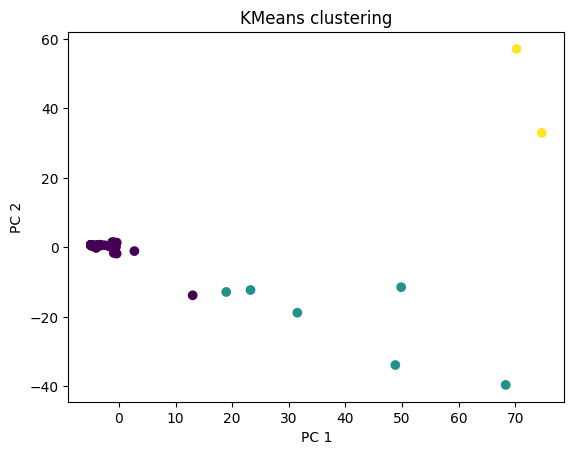

In [53]:
plt.scatter(r_proj.iloc[:,0], r_proj.iloc[:,1], c=r_km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

<Axes: xlabel='lng', ylabel='lat'>

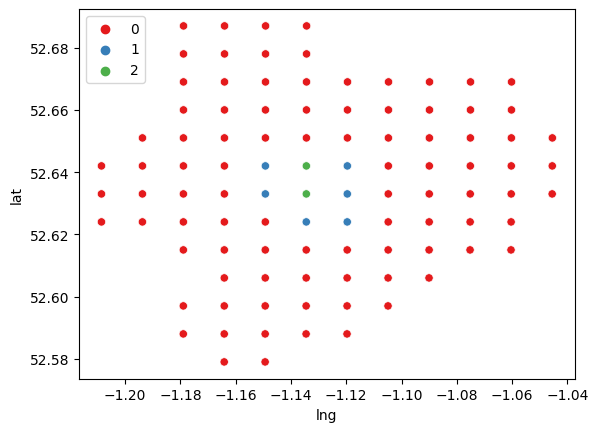

In [54]:
sns.scatterplot(x=leicester_golden_df['lng'], y=leicester_golden_df['lat'], hue= r_km.labels_, palette= "Set1" )

In [55]:
sns.color_palette("husl", 8)


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

# Scaler Engeneering
